In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/event_params.csv')

In [110]:
df.head(10)

,event_date,user_pseudo_id,page_title,page_location,page_referrer,event_timestamp
0,20240123,1.803115e+09,Multiple Part Numbers Search | P.com,https://www.p.com/search-list,https://www.p.com/catalog-product/collection/4...,1706041021863308
1,20240123,1.370019e+09,"Polaris 5133428 - Nut, Axle | P.com",https://www.p.com/product/polaris/5133428?ref=...,http://m.facebook.com/,1706043908464706
2,20240123,2.091432e+09,Rock-A-Billy Front/Rear Tires | P.com,https://www.p.com/catalog-product/collection/0...,http://m.facebook.com/,1706055327780748
3,20240123,1.821760e+09,"Honda 11330-MFJ-A40 - COVER, R. | P.com",https://www.p.com/product/honda/11330-MFJ-A40?...,NaN,1705989378681557
4,20240123,1.665243e+09,"P: OEM Motorcycle Parts, ATV Parts, Marine Parts",https://www.p.com/?utm_source=facebook&utm_med...,http://m.facebook.com/,1706013824763773
5,20240123,1.224651e+08,"Honda 77100-HL3-B41 - SEAT CUSHION, ASSY. | P.com",https://www.p.com/product/honda/77100-HL3-B41?...,http://m.facebook.com/,1706006681090607
6,20240123,9.924966e+08,Yamaha 43D-F1600-10-00 - FENDER | P.com,https://www.p.com/product/yamaha/43D-F1600-10-...,http://m.facebook.com/,1706061076382616
7,20240123,9.924966e+08,Yamaha 1PE-F1600-40-00 - FENDER | P.com,https://www.p.com/product/yamaha/1PE-F1600-40-...,http://m.facebook.com/,1706061123385040
8,20240123,2.030970e+09,"OEM Suzuki ATV Parts [King Quad, Quad Sport, O...",https://www.p.com/catalog/suzuki/atv?utm_sourc...,NaN,1705987082704880
9,20240123,2.030970e+09,"OEM Suzuki ATV Parts [King Quad, Quad Sport, O...",https://www.p.com/catalog/suzuki/atv?utm_sourc...,NaN,1705987893846151


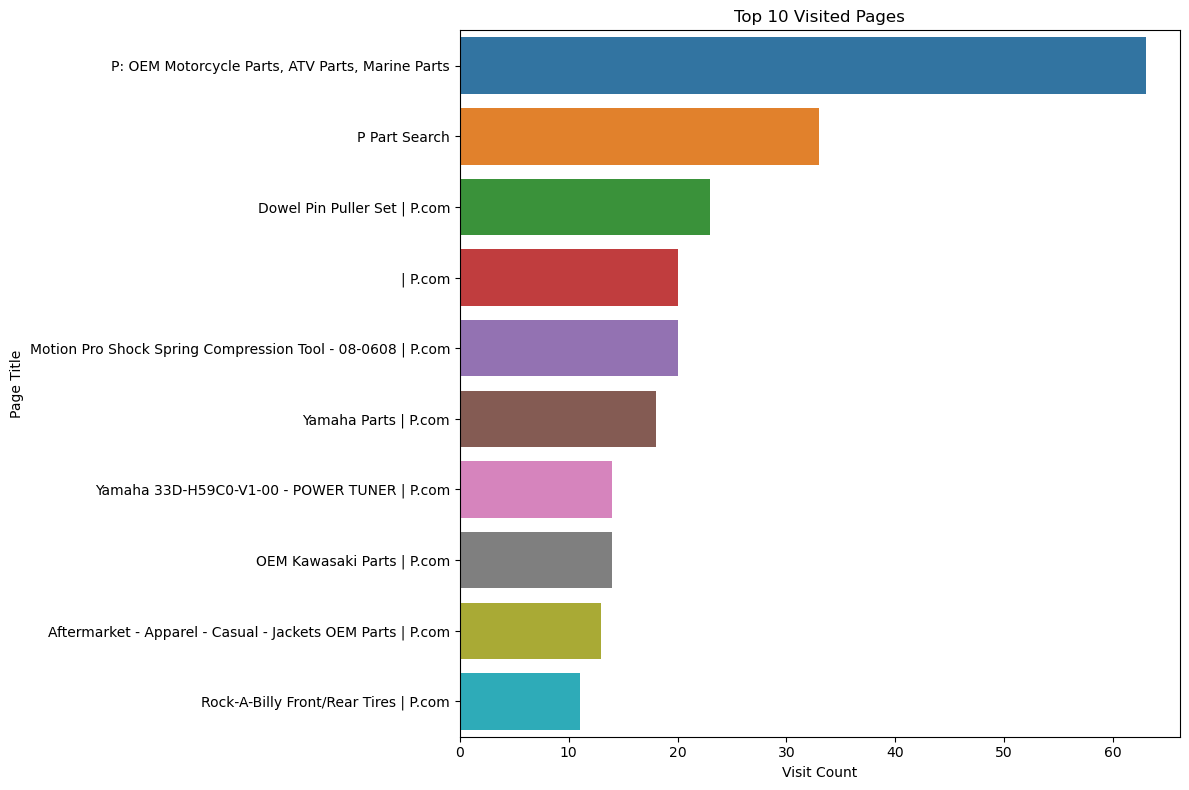

In [111]:
# Replace NaN with "No Referrer" for visualization purposes
df['page_referrer'].fillna('No Referrer', inplace=True)

top_pages = df['page_title'].value_counts().nlargest(10)  # Get the top 10 visited pages

plt.figure(figsize=(12, 8))
sns.barplot(y=top_pages.index, x=top_pages.values)
plt.title("Top 10 Visited Pages")
plt.xlabel("Visit Count")
plt.ylabel("Page Title")
plt.tight_layout()
plt.show()


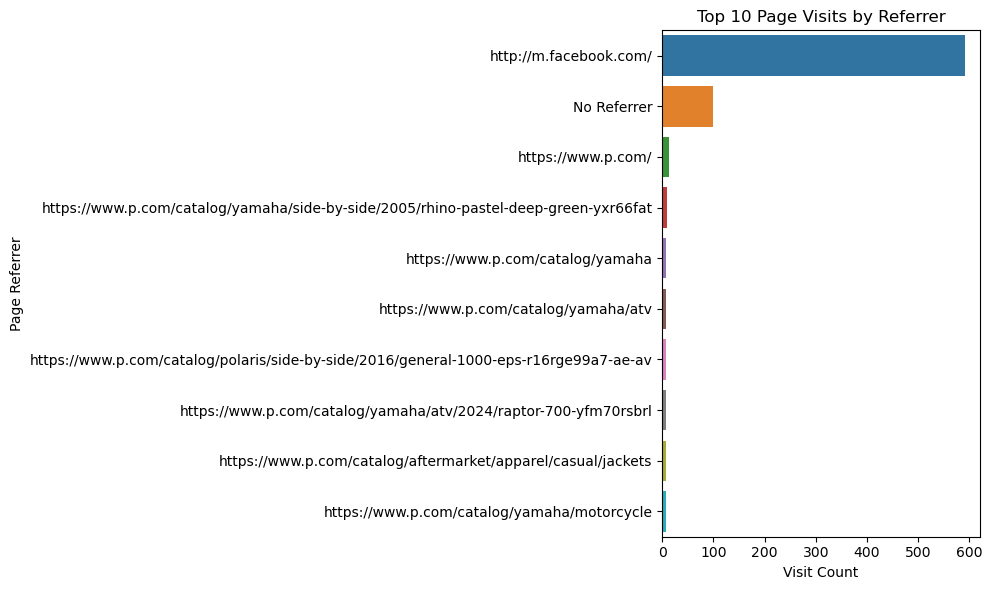

In [112]:
# Program to visualize the top 10 page referrers only
top_referrers = df['page_referrer'].value_counts().nlargest(10)  # Get the top 10 referrers

plt.figure(figsize=(10, 6))
sns.barplot(y=top_referrers.index, x=top_referrers.values)
plt.title("Top 10 Page Visits by Referrer")
plt.xlabel("Visit Count")
plt.ylabel("Page Referrer")
plt.tight_layout()
plt.show()


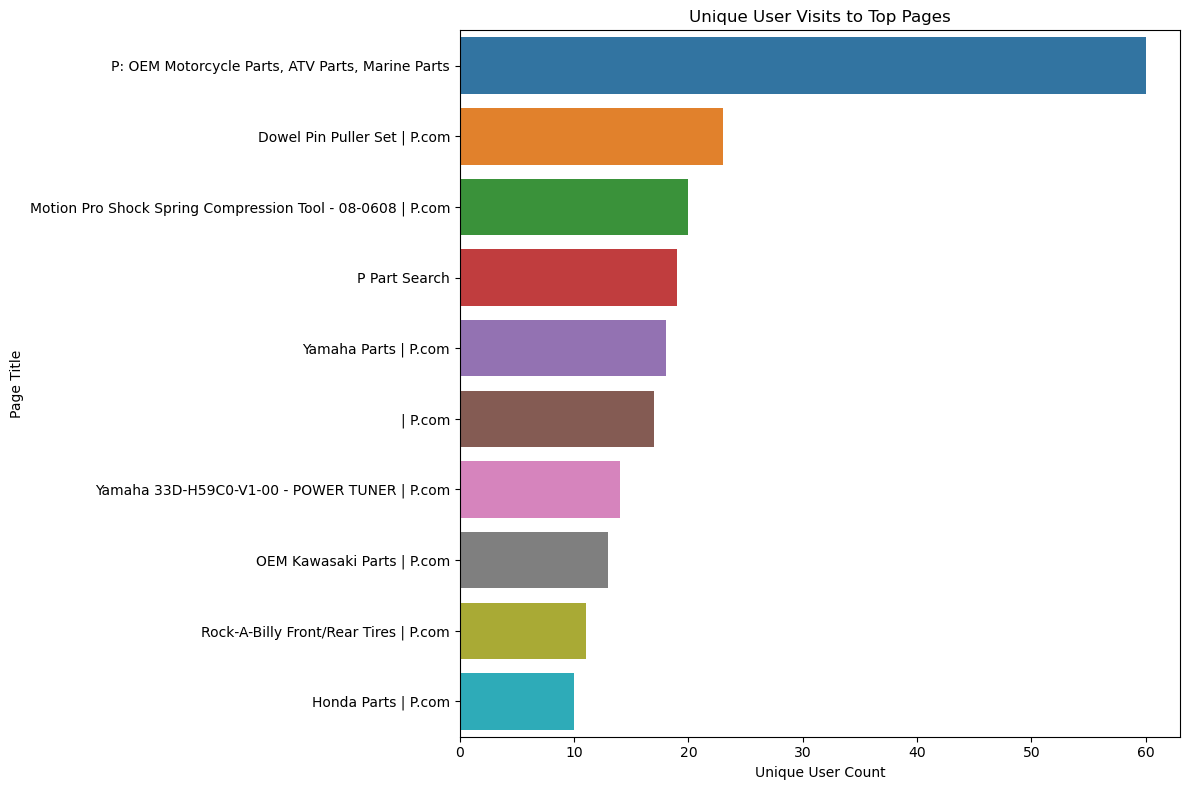

In [117]:
# Unique User Visits: Count of unique visits to different pages.
unique_user_visits = df.groupby('page_title')['user_pseudo_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=unique_user_visits.index, x=unique_user_visits.values)
plt.title("Unique User Visits to Top Pages")
plt.xlabel("Unique User Count")
plt.ylabel("Page Title")
plt.tight_layout()
plt.show()

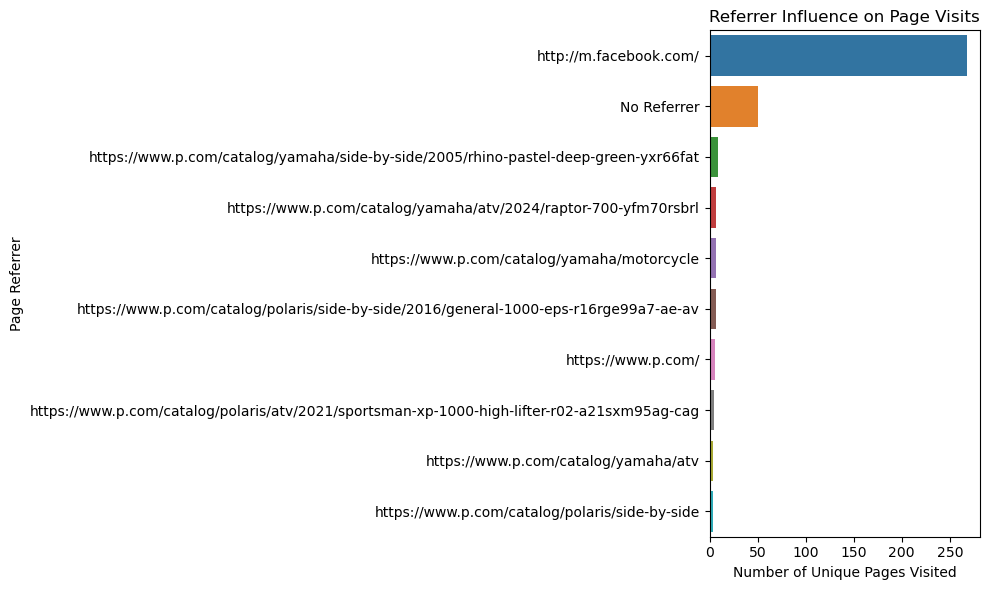

In [118]:
# Referrer Influence on Page Visits: Number of unique pages visited from each referrer.
referrer_page_visits = df.groupby('page_referrer')['page_title'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=referrer_page_visits.index, x=referrer_page_visits.values)
plt.title("Referrer Influence on Page Visits")
plt.xlabel("Number of Unique Pages Visited")
plt.ylabel("Page Referrer")
plt.tight_layout()
plt.show()

In [120]:
df['page_title'].value_counts()

page_title
P: OEM Motorcycle Parts, ATV Parts, Marine Parts              63
P Part Search                                                 33
Dowel Pin Puller Set | P.com                                  23
| P.com                                                       20
Motion Pro Shock Spring Compression Tool - 08-0608 | P.com    20
                                                              ..
Yamaha - ATV - 2024 - RAPTOR 700 - YFM70RSBRL | P.com          1
Honda 89010-MEA-650 - TOOL SET | P.com                         1
Suzuki 69600-33C00 - CYLINDER | P.com                          1
Suzuki 59667-44B00 - MASTER DIAPHRAGM | P.com                  1
Yamaha ATV 2023 OEM Parts Diagram for Rear Arm | P.com         1
Name: count, Length: 478, dtype: int64

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import OneHotEncoder

attributes = df.iloc[:, 2:]

# Applying frequency label encoder
# Count the frequency of each category in each column
frequency_encoded_attributes = attributes.apply(lambda x: x.map(x.value_counts()))


In [ ]:
transposed_attributes=frequency_encoded_attributes.T

In [ ]:
# Apply hierarchical clustering
Z = linkage(transposed_attributes, 'ward')

In [ ]:
Z

array([[0.00000000e+00, 1.00000000e+00, 5.53534100e+02, 2.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.64632056e+04, 3.00000000e+00]])

In [ ]:
df

,eventDate,userPseudoId,pageTitle,pageLocation,pageReferrer
0,20240123,1.803115e+09,Multiple Part Numbers Search | P.com,https://www.p.com/search-list,https://www.p.com/catalog-product/collection/4...
1,20240123,1.370019e+09,"Polaris 5133428 - Nut, Axle | P.com",https://www.p.com/product/polaris/5133428?ref=...,http://m.facebook.com/
2,20240123,2.091432e+09,Rock-A-Billy Front/Rear Tires | P.com,https://www.p.com/catalog-product/collection/0...,http://m.facebook.com/
3,20240123,1.821760e+09,"Honda 11330-MFJ-A40 - COVER, R. | P.com",https://www.p.com/product/honda/11330-MFJ-A40?...,No Referrer
4,20240123,1.665243e+09,"P: OEM Motorcycle Parts, ATV Parts, Marine Parts",https://www.p.com/?utm_source=facebook&utm_med...,http://m.facebook.com/
...,...,...,...,...,...
995,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...
996,20240123,8.756038e+08,Yamaha ATV Parts | P.com,https://www.p.com/catalog/yamaha/atv,https://www.p.com/catalog/yamaha?utm_source=fa...
997,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...
998,20240123,8.756038e+08,Yamaha ATV 2023 OEM Parts Diagram for Graphics...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...,https://www.p.com/catalog/yamaha/atv/2023/yfz4...


In [ ]:
page_titles = df['pageTitle'].tolist()


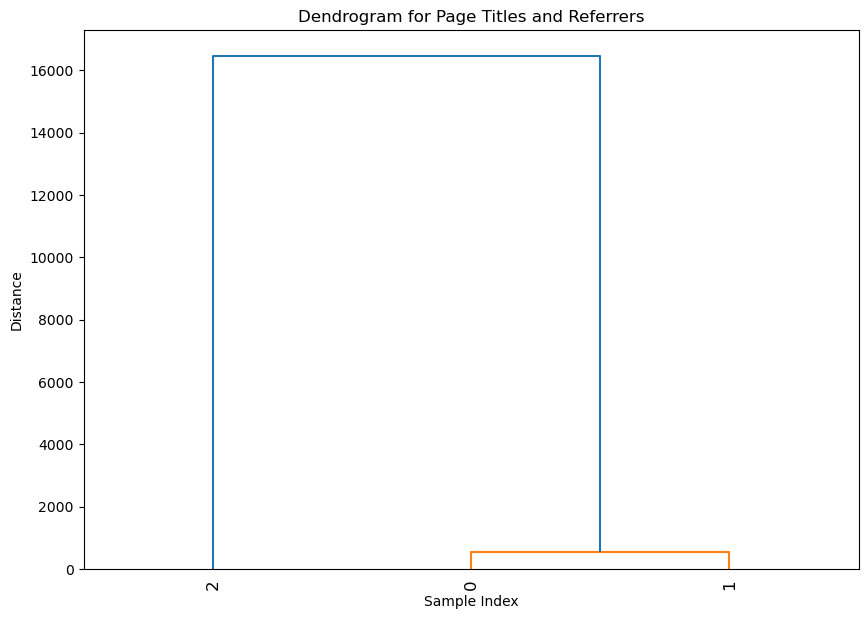

In [ ]:
# Generate dendrogram
plt.figure(figsize=(10, 7))
#dendrogram(Z, labels=page_titles, leaf_rotation=10)
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90, show_contracted=True)

plt.title('Dendrogram for Page Titles and Referrers')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()